In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# 0.Data Cleaning

In [3]:
# Note: data downloaded from Yu group Github on 5/7/20
demo = pd.read_csv('data/county_data_abridged.csv')
demo.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,South,East South Central,2.0,55601.0,27007.0,28497.0,0.486578,8392.0,91.8,54571.0,37.0,11439.0,8046.0,16.0,9.9,204.5,56.1,18.081557,81.79,324.0,50.0,0.0,1.0,6.0,0.326656,1866.0,1713.0,2001.0,1990.0,2171.0,2119.0,2213.0,2077.0,1539.0,1541.0,1543.0,1614.0,1594.0,1736.0,3978.0,4265.0,4040.0,4165.0,1524.0,1559.0,1279.0,1498.0,1821.0,2192.0,841.0,1141.0,159.0,392.0,NaN,NaN,NaN,NaN,10.0,20.0,44.0,73.0,112.0,143.0,109.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,South,East South Central,3.0,218022.0,103225.0,109403.0,0.485472,42413.0,114.7,182265.0,41.1,54145.0,41590.0,33.0,8.5,183.2,41.9,17.489033,54.28,2101.0,536.0,0.0,3.0,51.0,0.253255,5614.0,5544.0,5832.0,5767.0,6076.0,5850.0,5930.0,5670.0,4793.0,4656.0,5183.0,5064.0,5317.0,5392.0,11620.0,11933.0,13047.0,13874.0,5943.0,6580.0,5728.0,6284.0,8558.0,9245.0,4379.0,5153.0,1176.0,2057.0,13.0,NaN,NaN,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,South,East South Central,6.0,24881.0,13335.0,11935.0,0.527701,4757.0,31.0,27457.0,39.0,6681.0,4706.0,NaN,15.7,220.4,49.0,21.999985,69.82,181.0,12.0,0.0,1.0,5.0,0.893106,847.0,855.0,826.0,816.0,820.0,779.0,919.0,812.0,1048.0,746.0,1212.0,798.0,1162.0,646.0,2115.0,1513.0,2164.0,1854.0,910.0,907.0,859.0,940.0,1067.0,1171.0,498.0,730.0,129.0,314.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,44.0,65.0,72.0,68.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,South,East South Central,1.0,22400.0,12138.0,10530.0,0.535469,3632.0,36.8,22915.0,37.8,5128.0,3389.0,NaN,13.3,225.5,57.2,19.114200,84.49,145.0,16.0,0.0,1.0,0.0,0.278124,712.0,666.0,759.0,646.0,771.0,669.0,806.0,737.0,811.0,680.0,987.0,616.0,1013.0,633.0,1895.0,1487.0,1883.0,1503.0,734.0,667.0,684.0,650.0,803.0,920.0,370.0,534.0,73.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,37.0,62.0,56.0,45.0,NaN,737519.0,737504.0,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,1498

In [4]:
# Note: data downloaded from CSSE Github on 5/7/20
infections = pd.read_csv('data/05-06-2020.csv')
infections.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-07 02:32:28,34.223334,-82.461707,33,0,0,33,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-07 02:32:28,30.295065,-92.414197,140,10,0,130,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-07 02:32:28,37.767072,-75.632346,429,7,0,422,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-07 02:32:28,43.452658,-116.241552,717,19,0,698,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-07 02:32:28,41.330756,-94.471059,3,0,0,3,"Adair, Iowa, US"


In [5]:
# Note: data downloaded from CSSE Github on 5/7/20
deaths = pd.read_csv('data/time_series_covid19_deaths_US.csv')
deaths.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",164229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",55144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2933408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,3,3,3,6,8,11,12,15,18,20,21,23,24,33,39,42,44,45,45,51,56,58,60,62,63,64,63,69,77,83,84,84,86,86,92,94,95,97,97,99,99,102,107
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",107268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,2,2,2,2,2,3,4,4,4,3,3,3,3,3,3,3,4
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,5,5,5,5
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
# Note: data downloaded from CSSE Github on 5/7/20
cases = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
cases.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,6,6,6,6,7,8,10,12,12,12,12,12,12,15,17,19,19,19,23,24,26,26,25,26,28,30,32,33,36,36,37,39,40,43,44,42,45,48,53,53,58,61,67
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,3,4,4,5,5,10,15,18,19,20,24,28,29,29,38,42,44,56,59,66,71,72,87,91,101,103,109,112,117,123,132,143,147,147,161,168,171,174,174,175,181,187,188,189,196,205,208
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,3,3,4,9,9,10,10,11,12,14,15,18,20,22,28,29,30,32,32,33,35,37,37,39,42,43,45,45,47,47,51,53
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,4,4,4,5,7,8,9,9,11,13,1

In [7]:
demo.shape

(3244, 87)

In [8]:
demo.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [9]:
demo.iloc[:, :14].isna().sum()

countyFIPS                        0
STATEFP                          23
COUNTYFP                         23
CountyName                        0
StateName                         0
State                           169
lat                             169
lon                             169
POP_LATITUDE                     23
POP_LONGITUDE                    23
CensusRegionName                 98
CensusDivisionName               98
Rural-UrbanContinuumCode2013     24
PopulationEstimate2018           23
dtype: int64

In [10]:
deaths.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
Population         0
1/22/20            0
1/23/20            0
dtype: int64

In [11]:
deaths.shape

(3261, 120)

In [12]:
deaths[deaths['FIPS'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",488943,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,5,7,7,8,8,8,8,12,12,12,13,13,13,13,13,13,14,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,12,12,15,17,17,19,20,25,28,28,31,32,37,38,41,42,42,42,42,45,48,48,50,50
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,3,3
3255,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3260,84070020,US,USA,840,NaN,Weber-Morgan,Utah

In [13]:
# dropping these 10 rows should not bias our analysis later on
deaths['FIPS'] = deaths['FIPS'].fillna(-1).astype(int)

In [14]:
cases.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
1/22/20            0
1/23/20            0
1/24/20            0
dtype: int64

In [15]:
cases['FIPS'] = cases['FIPS'].fillna(-1).astype(int)

In [16]:
demo['countyFIPS'].str.isnumeric().value_counts()

True     3242
False       2
Name: countyFIPS, dtype: int64

In [17]:
demo.iloc[-2:]

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,CensusPopulation2010,MedianAge2010,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017",3-YrDiabetes2015-17,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,RespMortalityRate2014,#FTEHospitalTotal2017,"TotalM.D.'s,TotNon-FedandFed2017",#HospParticipatinginNetwork2017,#Hospitals,#ICU_beds,dem_to_rep_ratio,PopMale<52010,PopFmle<52010,PopMale5-92010,PopFmle5-92010,PopMale10-142010,PopFmle10-142010,PopMale15-192010,PopFmle15-192010,PopMale20-242010,PopFmle20-242010,PopMale25-292010,PopFmle25-292010,PopMale30-342010,PopFmle30-342010,PopMale35-442010,PopFmle35-442010,PopMale45-542010,PopFmle45-542010,PopMale55-592010,PopFmle55-592010,PopMale60-642010,PopFmle60-642010,PopMale65-742010,PopFmle65-742010,PopMale75-842010,PopFmle75-842010,PopMale>842010,PopFmle>842010,3-YrMortalityAge<1Year2015-17,3-YrMortalityAge1-4Years2015-17,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3243,City2,NaN,NaN,Kansas City,MO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# since there appears to be no info for these 2 rows, we will drop them
demo = demo.iloc[:-2]
demo['countyFIPS'].str.isnumeric().value_counts()

True    3242
Name: countyFIPS, dtype: int64

In [19]:
demo['FIPS'] = demo['countyFIPS'].astype(int)

In [20]:
# now we can merge demo data with ts data on FIPS
print(len(deaths), len(cases))
deaths = deaths.merge(demo, on = 'FIPS')
cases = cases.merge(demo, on = 'FIPS')
print(len(deaths), len(cases))


3261 3261
3140 3140


# 1.Death Rate Prediction

### Question: What features is affecting the death rate of the covid-19
### Hypothesis: The underlined health conditions, bad living habits and hospital quality is affecting.

## 1.1 Death Rate Analysis

In [21]:
death_rate = 100*deaths['5/6/20']/cases['5/6/20'].fillna(0)

In [22]:
print('average mortality rate:', death_rate.mean())
print('varaince in mortality rate:', death_rate.var())
print('max mortality rate:', death_rate.max())
print('min mortality rate:', death_rate.min())

average mortality rate: 3.612419113481638
varaince in mortality rate: 41.74665295054855
max mortality rate: 100.0
min mortality rate: 0.0


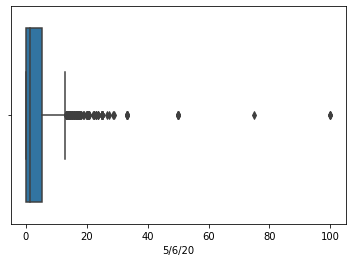

In [23]:
sns.boxplot(death_rate)

In [24]:
death_rate[death_rate > 20].count()

55

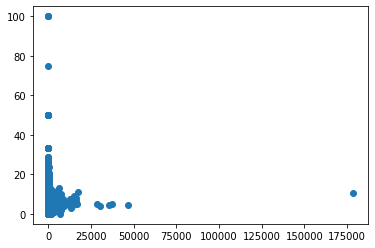

In [25]:
plt.scatter(cases['5/6/20'], death_rate)

(0.0, 10000.0)

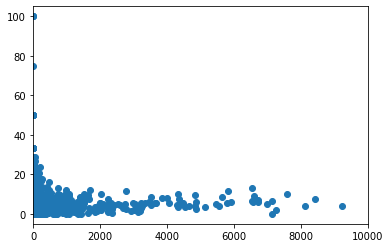

In [26]:
plt.scatter(cases['5/6/20'], death_rate)
plt.xlim([0, 10000])

In [27]:
deaths.iloc[2962].loc['1/22/20':'5/6/20']

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
5/2/20     0
5/3/20     0
5/4/20     0
5/5/20     0
5/6/20     0
Name: 2962, Length: 106, dtype: object

In [28]:
cases['death_rate'] = death_rate
cases = cases.rename(columns = {'5/6/20' : 'cur_cases'})

In [29]:
cases_filtered = cases[cases['cur_cases'] > 50]

In [30]:
cases.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'public schools', 'restaurant dine-in', 'entertainment/gym',
       'federal guidelines', 'foreign travel ban', 'SVIPercentile',
       'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop', 'death_rate'],
      dtype='object', length=207)

In [31]:
income = pd.read_excel('data/Unemployment.xls', header = 4)
income.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,153761095.0,144860350.0,8900745.0,5.8,153825455.0,139594698.0,14230757.0,9.3,154270732.0,139408204.0,14862528.0,9.63,154606316.0,140765809.0,13840507.0,8.95,155119195.0,142600402.0,12518793.0,8.07,155485692.0,144018151.0,11467541.0,7.38,155957297.0,146338305.0,9618992.0,6.17,156866585.0,148579026.0,8287559.0,5.28,158708795.0,150981151.0,7727644.0,4.87,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,61937.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,238252.0,11.0,2196042.0,1964559.0,231483.0,10.50,2202670.0,1990413.0,212257.0,9.60,2176337.0,2003290.0,173047.0,8.00,2174000.0,2017043.0,156957.0,7.20,2160842.0,2014290.0,146552.0,6.80,2158293.0,2026898.0,131395.0,6.10,2177209.0,2049971.0,127238.0,5.80,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,49881.0,100.0000
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,24687.0,23420.0,1267.0,5.1,24703.0,22301.0,2402.0,9.7,25713.0,23431.0,2282.0,8.90,25836.0,23677.0,2159.0,8.40,25740.0,23961.0,1779.0,6.90,25810.0,24205.0,1605.0,6.20,25592.0,24097.0,1495.0,5.80,25613.0,24283.0,1330.0,5.20,25966.0,24645.0,1321.0,5.10,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,59338.0,118.9591
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,83223.0,79372.0,3851.0,4.6,82451.0,74403.0,8048.0,9.8,83459.0,75120.0,8339.0,10.00,85045.0,77418.0,7627.0,9.00,84414.0,78065.0,6349.0,7.50,85280.0,79626.0,5654.0,6.60,86384.0,81083.0,5301.0,6.10,87741.0,82882.0,4859.0,5.50,90670.0,85839.0,4831.0,5.30,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,57588.0,115.4508
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,10161.0,9267.0,894.0,8.8,10003.0,8572.0,1431.0,14.3,10221.0,8959.0,1262.0,12.30,9849.0,8712.0,1137.0,11.50,9362.0,8283.0,1079.0,11.50,9099.0,8168.0,931.0,10.20,8845.0,7913.0,932.0,10.50,8613.0,7848.0,765.0,8.90,8417.0,7717.0,700.0,8.30,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,34382.0,68.9280


In [32]:
income = income[['FIPS', 'Median_Household_Income_2018']]
income

,FIPS,Median_Household_Income_2018
0,0,61937.0
1,1000,49881.0
2,1001,59338.0
3,1003,57588.0
4,1005,34382.0
...,...,...
3270,72145,NaN
3271,72147,NaN
3272,72149,NaN
3273,72151,NaN


In [33]:
income['FIPS'] = income['FIPS'].astype(int)

In [34]:
income_v_dr = cases_filtered[['FIPS', 'death_rate']].merge(income, on = 'FIPS')

## 1.2 Correlation of Different Features on Death Rate
Following are some scatters to check whether there is correlation between one feature and the death rate.

### Income Features v.s. Death Rate

Text(0, 0.5, 'Death Rate as of 5/6/20')

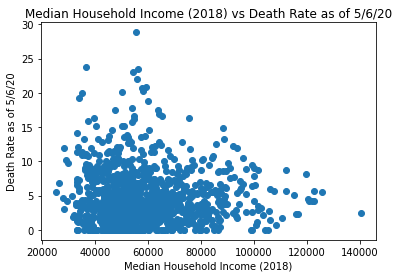

In [35]:
plt.scatter(income_v_dr['Median_Household_Income_2018'], income_v_dr['death_rate'])
plt.title('Median Household Income (2018) vs Death Rate as of 5/6/20')
plt.xlabel('Median Household Income (2018)')
plt.ylabel('Death Rate as of 5/6/20')

This plot suggests an inverse relationship. While there is not a perfect correlation here, I think this suggests that median household income will be a good feature to use when predicting death rate.

### Age Features over Death Rate

In [36]:
cases_filtered['over_65_2010'] = ((cases_filtered['PopMale75-842010'] + cases_filtered['PopFmle75-842010']
                                  + cases_filtered['PopMale75-842010'] + cases_filtered['PopFmle75-842010'] 
                                  + cases_filtered['PopMale>842010'] + cases_filtered['PopFmle>842010']) / 
                                  cases_filtered['CensusPopulation2010'])

<ipython-input-36-dc9926d18175>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_filtered['over_65_2010'] = ((cases_filtered['PopMale75-842010'] + cases_filtered['PopFmle75-842010']


Text(0, 0.5, 'Death Rate as of 5/6/20')

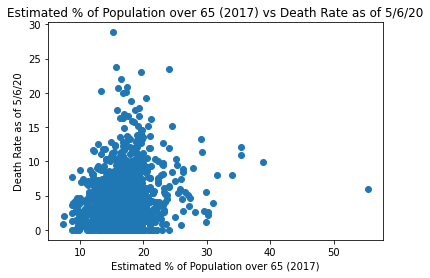

In [37]:
plt.scatter(100 * cases_filtered['PopulationEstimate65+2017']/cases_filtered['PopulationEstimate2018'], cases_filtered['death_rate'])
plt.title('Estimated % of Population over 65 (2017) vs Death Rate as of 5/6/20')
plt.xlabel('Estimated % of Population over 65 (2017)')
plt.ylabel('Death Rate as of 5/6/20')

Based on this plot, age does not seem like a good feature to use when trying to predict death rate. In fact, it appears that the higher death rate.

Text(0, 0.5, 'Death Rate as of 5/6/20')

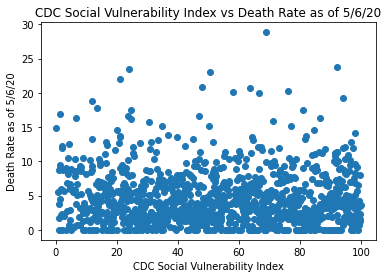

In [38]:
plt.scatter(100 * cases_filtered['SVIPercentile'], cases_filtered['death_rate'])
plt.title('CDC Social Vulnerability Index vs Death Rate as of 5/6/20')
plt.xlabel('CDC Social Vulnerability Index')
plt.ylabel('Death Rate as of 5/6/20')

Similarly, the CDC's Social Vulnerability Index does not seem to have any correlation to death rate

Text(0, 0.5, 'Death Rate as of 5/6/20')

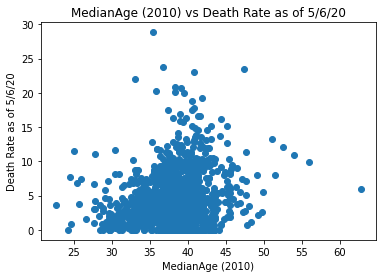

In [39]:
plt.scatter(cases_filtered['MedianAge2010'], cases_filtered['death_rate'])
plt.title('MedianAge (2010) vs Death Rate as of 5/6/20')
plt.xlabel('MedianAge (2010)')
plt.ylabel('Death Rate as of 5/6/20')

### Hospital Quality v.s. Death Rate

In [40]:
cases_filtered['hosp_per_pop'] = cases_filtered['#Hospitals']/cases_filtered['PopulationEstimate2018']
cases_filtered['hosp_per_pop'] = cases_filtered['#Hospitals']/cases_filtered['PopulationEstimate2018']

<ipython-input-40-f3ac31c2d11e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_filtered['hosp_per_pop'] = cases_filtered['#Hospitals']/cases_filtered['PopulationEstimate2018']
<ipython-input-40-f3ac31c2d11e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_filtered['hosp_per_pop'] = cases_filtered['#Hospitals']/cases_filtered['PopulationEstimate2018']


Text(0, 0.5, 'Death Rate as of 5/6/20')

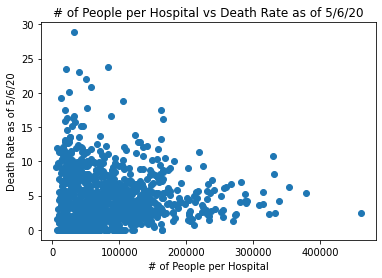

In [41]:
plt.scatter(cases_filtered['PopulationEstimate2018']/cases_filtered['#Hospitals'], cases_filtered['death_rate'])
plt.title('# of People per Hospital vs Death Rate as of 5/6/20')
plt.xlabel('# of People per Hospital')
plt.ylabel('Death Rate as of 5/6/20')

Text(0, 0.5, 'Death Rate as of 5/6/20')

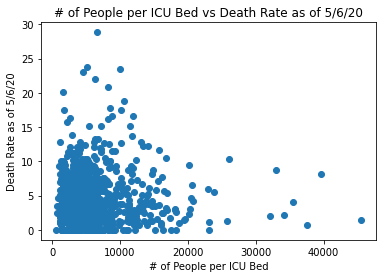

In [42]:
plt.scatter(cases_filtered['PopulationEstimate2018']/cases_filtered['#ICU_beds'], cases_filtered['death_rate'])
plt.title('# of People per ICU Bed vs Death Rate as of 5/6/20')
plt.xlabel('# of People per ICU Bed')
plt.ylabel('Death Rate as of 5/6/20')

Text(0, 0.5, 'Death Rate as of 5/6/20')

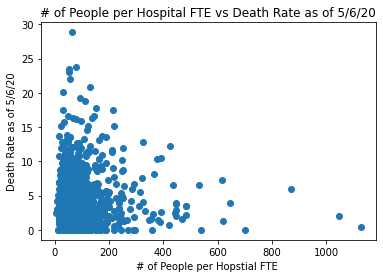

In [43]:
plt.scatter(cases_filtered['PopulationEstimate2018']/cases_filtered['#FTEHospitalTotal2017'], cases_filtered['death_rate'])
plt.title('# of People per Hospital FTE vs Death Rate as of 5/6/20')
plt.xlabel('# of People per Hopstial FTE ')
plt.ylabel('Death Rate as of 5/6/20')

Comment on hospital quality: from the scatter plots above, hospital quality is slightly correlated to death rate.

### Healtecare v.s. Death Rate

Text(0, 0.5, 'Death Rate as of 5/6/20')

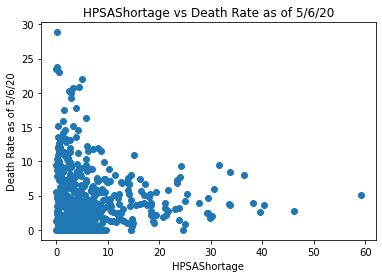

In [44]:
plt.scatter(cases_filtered['HPSAShortage'], cases_filtered['death_rate'])
plt.title('HPSAShortage vs Death Rate as of 5/6/20')
plt.xlabel('HPSAShortage')
plt.ylabel('Death Rate as of 5/6/20')

Text(0, 0.5, 'Death Rate as of 5/6/20')

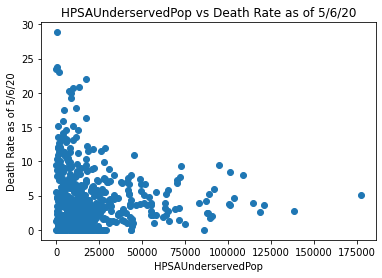

In [45]:
plt.scatter(cases_filtered['HPSAUnderservedPop'], cases_filtered['death_rate'])
plt.title('HPSAUnderservedPop vs Death Rate as of 5/6/20')
plt.xlabel('HPSAUnderservedPop')
plt.ylabel('Death Rate as of 5/6/20')

### Policies v.s. Death Rate

Text(0, 0.5, 'Death Rate as of 5/6/20')

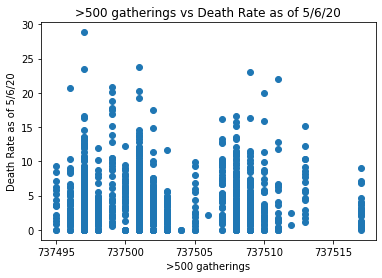

In [46]:
plt.scatter(cases_filtered['>500 gatherings'], cases_filtered['death_rate'])
plt.title('>500 gatherings vs Death Rate as of 5/6/20')
plt.xlabel('>500 gatherings')
plt.ylabel('Death Rate as of 5/6/20')

Text(0, 0.5, 'Death Rate as of 5/6/20')

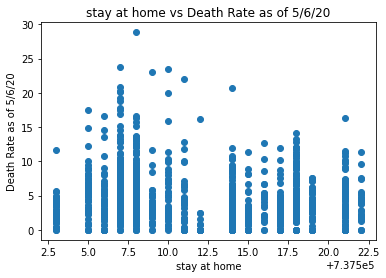

In [47]:
plt.scatter(cases_filtered['stay at home'], cases_filtered['death_rate'])
plt.title('stay at home vs Death Rate as of 5/6/20')
plt.xlabel('stay at home')
plt.ylabel('Death Rate as of 5/6/20')

Text(0, 0.5, 'Death Rate as of 5/6/20')

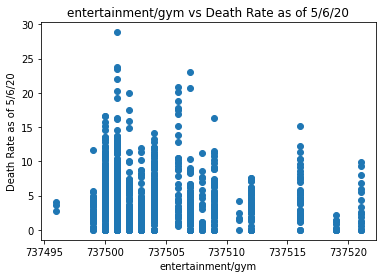

In [48]:
plt.scatter(cases_filtered['entertainment/gym'], cases_filtered['death_rate'])
plt.title('entertainment/gym vs Death Rate as of 5/6/20')
plt.xlabel('entertainment/gym')
plt.ylabel('Death Rate as of 5/6/20')

### Location v.s. Death Rate

Text(0, 0.5, 'Death Rate as of 5/6/20')

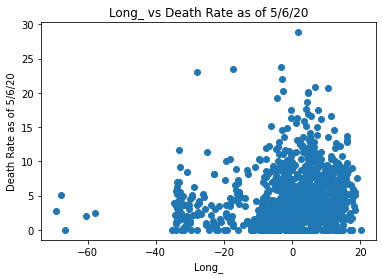

In [49]:
plt.scatter(cases_filtered['Long_'] - np.mean(cases_filtered['Long_']), cases_filtered['death_rate'])
plt.title('Long_ vs Death Rate as of 5/6/20')
plt.xlabel('Long_')
plt.ylabel('Death Rate as of 5/6/20')

All three of these heathcare resources appear to be good indicators of death rate.

In [50]:
dr = cases_filtered[['FIPS', 
                     'death_rate', 
                     'PopulationEstimate2018', 
                     '#Hospitals', 
                     '#ICU_beds', 
                     '#FTEHospitalTotal2017', 
                     'Lat', 
                     'Long_',
                     'over_65_2010', 
                     'MedianAge2010',
                     '#HospParticipatinginNetwork2017', 
                     'HPSAShortage', 'HPSAUnderservedPop', 
                     '>500 gatherings', 'entertainment/gym', 'stay at home']].merge(
                    income, on = 'FIPS')

In [51]:
# some second level features
dr['pop_per_hosp'] = dr['PopulationEstimate2018']/(dr['#Hospitals'] + 1e-8)
dr['pop_per_icu_bed'] = dr['PopulationEstimate2018']/(dr['#ICU_beds'] + 1e-8)
dr['pop_per_hosp_fte'] = dr['PopulationEstimate2018']/(dr['#FTEHospitalTotal2017'] + 1e-8)
dr['lat'] = dr['Lat'] - np.mean(dr['Lat'])
dr['long'] = dr['Long_'] - np.mean(dr['Long_'])
dr = dr.fillna(0)
dr.isna().sum()

FIPS                               0
death_rate                         0
PopulationEstimate2018             0
#Hospitals                         0
#ICU_beds                          0
#FTEHospitalTotal2017              0
Lat                                0
Long_                              0
over_65_2010                       0
MedianAge2010                      0
#HospParticipatinginNetwork2017    0
HPSAShortage                       0
HPSAUnderservedPop                 0
>500 gatherings                    0
entertainment/gym                  0
stay at home                       0
Median_Household_Income_2018       0
pop_per_hosp                       0
pop_per_icu_bed                    0
pop_per_hosp_fte                   0
lat                                0
long                               0
dtype: int64

In [52]:
ftrs = [
    'pop_per_hosp', 'pop_per_icu_bed', 'pop_per_hosp_fte', '#HospParticipatinginNetwork2017', # hospital quality features
    'Median_Household_Income_2018', # economic features
    'lat', 'long', # geographical features
    'over_65_2010', 'MedianAge2010',# age features
    'HPSAShortage', 'HPSAUnderservedPop',  # healthcare features
    '>500 gatherings', # policy features
]
X = dr[ftrs]
y = dr['death_rate']

## 1.3 Regression Model

### 1.3.1 Model Selection

In [53]:
def rmse(pred, real):
    return np.sqrt(np.mean(np.square(pred - real)))

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

Base Line: mean prediction

In [55]:
print('mean predictor rmse:', rmse(np.mean(y_train)*np.ones(len(y_test)), y_test))

mean predictor rmse: 3.50707311248282


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [57]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
print('model rmse:', rmse(lr.predict(X_test), y_test))

model rmse: 3.3728674369052545


In [58]:
lr = Ridge(alpha=0.5)
lr.fit(X_train, y_train)
print('model rmse:', rmse(lr.predict(X_test), y_test))

model rmse: 3.366124035939014


/home/charliechen/anaconda3/envs/cs282/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.54629e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [59]:
rfr = RandomForestRegressor(max_depth=7, random_state=42)
rfr.fit(X_train, y_train)
print('model rmse:', rmse(rfr.predict(X_test), y_test))

model rmse: 3.1413439897829645


From the result above, appearently Random Forest model outperforms all the others.

### 1.3.2 Hyper Parameters Tuning

In [60]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

rfr = RandomForestRegressor(random_state=42)
model_params = {
    # randomly sample numbers from 4 to 30 estimators
    'n_estimators': randint(4, 50),
    # randomly sample numbers from 2 to 20 for depth
    'max_depth': randint(2, 100),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}

clf = RandomizedSearchCV(rfr, model_params, n_iter=100, cv=5, random_state=42)

# train the random search meta-estimator to find the best model out of 100 candidates
best_model = clf.fit(X_train, y_train)

CPU times: user 21.5 s, sys: 594 ms, total: 22.1 s
Wall time: 22.1 s


In [61]:
from pprint import pprint
pprint(best_model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 35,
 'max_features': 0.2706628898482183,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 28,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [62]:
print('model rmse:', rmse(best_model.predict(X_test), y_test))

model rmse: 3.1243838302111784


### 1.3.3 Model Analysis

Feature ranking:
1. feature pop_per_hosp (0.133013)
2. feature pop_per_icu_bed (0.112612)
3. feature pop_per_hosp_fte (0.110469)
4. feature #HospParticipatinginNetwork2017 (0.105955)
5. feature Median_Household_Income_2018 (0.102032)
6. feature lat (0.090506)
7. feature long (0.082870)
8. feature over_65_2010 (0.076709)
9. feature MedianAge2010 (0.064067)
10. feature HPSAShortage (0.060828)
11. feature HPSAUnderservedPop (0.046809)
12. feature >500 gatherings (0.014132)


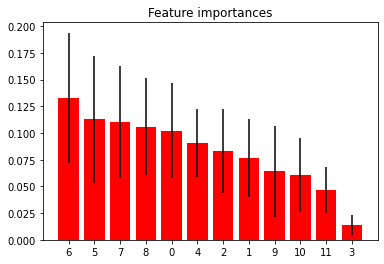

In [63]:
importances = best_model.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.best_estimator_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, ftrs[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 1.4 Conclusion
To conclude from the above analysis, importance of the features can be concluded as:
1. the <b>hospital quality features</b> are the <b>most important features</b> for death rate prediction. 
2. healthcare and income feature. 
3. geometric location seems to be very important for the death rate prediction 
4. policies locates at the 12th place.